## PRODUCT SALES FOR E COMPANY

### appendix 
-click on links: 

> <a href=#imports>Import Libraries</a>
          

> <a href=#load>Load Data</a>

> <a href=#formating>Data Formating</a>


> <a href=#EDA>Explratory Data Analysis (EDA):</a>

> <a href=#Questions>Data analsis</a>



# <a name=imports> Import libraries</a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport


# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 


In [2]:
! pip install pandas-profiling

# <a name=load>Load data</a>

In [3]:
df = pd.read_csv('Sales_April_2019.csv',
                delimiter=';',
                 na_values=' ',
                 )

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


# <a name=formating>Data formating</a>

In [6]:
# i need to change data format of four colums :order id ,Order Date, Quantity Ordered,Price Each 
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')


In [7]:
#Create another column for formatting date only without time
df['Date'] = df['Order Date'].str.split(' ').str[0]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,176558.0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19
3,176560.0,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
4,176560.0,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19


In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y', errors='coerce')

In [9]:
#convert Data type of Quantity Ordered
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

In [10]:
#convert Data type of Price Each Ordered
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [11]:
 
# converting the date to the required format
df['Date'] = pd.to_datetime(df['Date'], errors ='coerce')
#df.astype('int64').dtypes
  
# extracting the week from the date
df['week'] = df['Date'].dt.week
  


<ipython-input-11-d05a2c62bac6>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.week


In [12]:
w_dict = {
    14: 'week1',
    15: 'week2' ,
    16: 'week3',
    17: 'week4',
   

}

In [13]:
df['week_num']= df['week'].map(w_dict)

In [14]:
#Create another column total to calculate total price 

df["total"] = df["Price Each"] * df["Quantity Ordered"]


In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,week,week_num,total
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,16.0,week3,23.90
1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,14.0,week1,99.99
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,15.0,week2,600.00
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,15.0,week2,11.99


# <a name=EDA>Explratory data analysis(EDA)</a>

In [16]:
df.describe()

,Order ID,Quantity Ordered,Price Each,week,total
count,18289.000000,18289.00000,18289.000000,18289.000000,18289.000000
mean,185328.816720,1.12461,184.431026,15.666849,185.688617
std,5061.520829,0.43641,330.913377,1.242984,332.225363
min,176558.000000,1.00000,2.990000,14.000000,2.990000
25%,180952.000000,1.00000,11.950000,15.000000,11.950000
50%,185328.000000,1.00000,14.950000,16.000000,14.950000
75%,189706.000000,1.00000,150.000000,17.000000,150.000000
max,194094.000000,7.00000,1700.000000,18.000000,3400.000000


### 1. Handling with Null values


In [17]:
#find how many null valuse in each column

df.isna().sum(axis=0)

Order ID              94
Product               59
Quantity Ordered      94
Price Each            94
Order Date            59
Purchase Address      59
Date                  94
week                  94
week_num            1340
total                 94
dtype: int64

In [18]:
df.shape

(18383, 10)

In [19]:
#drop null values 

df.dropna(inplace=True)

In [20]:
df.shape

(17043, 10)

In [21]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,week,week_num,total
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,16.0,week3,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,14.0,week1,99.99
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,15.0,week2,600.00
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,15.0,week2,11.99
7,176563.0,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",2019-04-02,14.0,week1,99.99
...,...,...,...,...,...,...,...,...,...,...
18378,194090.0,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08,15.0,week2,600.00
18379,194091.0,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15,16.0,week3,3.84
18380,194092.0,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28,17.0,week4,5.98
18381,194093.0,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14,15.0,week2,3.84


In [22]:
#after del null values
df.isna().sum(axis=0)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Date                0
week                0
week_num            0
total               0
dtype: int64

### 2. Handling with Duplicated Values

In [23]:
sum(df.duplicated())

20

In [24]:
df.drop_duplicates(subset=['Order ID'], keep='first', inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,week,week_num,total
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19,16.0,week3,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07,14.0,week1,99.99
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12,15.0,week2,600.00
7,176563.0,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",2019-04-02,14.0,week1,99.99
8,176564.0,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",2019-04-12,15.0,week2,11.95
...,...,...,...,...,...,...,...,...,...,...
18378,194090.0,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08,15.0,week2,600.00
18379,194091.0,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15,16.0,week3,3.84
18380,194092.0,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28,17.0,week4,5.98
18381,194093.0,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14,15.0,week2,3.84


In [25]:
sum(df.duplicated())

0

In [26]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Date                0
week                0
week_num            0
total               0
dtype: int64

### 3. Handling with Missing Values


In [27]:
#to make sure no missing val in our dataset
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Order ID - 0%
Product - 0%
Quantity Ordered - 0%
Price Each - 0%
Order Date - 0%
Purchase Address - 0%
Date - 0%
week - 0%
week_num - 0%
total - 0%


### 4. Handling with Outliers Values


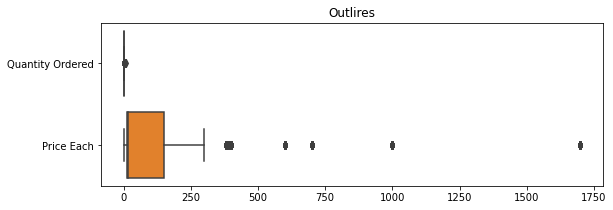

In [28]:
# Using box plots to check from Outliers Value
plt.figure(figsize=(9,3))
sns.boxplot(data=df[['Quantity Ordered', 'Price Each']], orient='h')
plt.title("Outlires")
plt.show()

In [29]:
#use mask to see -- outliers are price of product --
mask=(df['Price Each']>600)
df[mask]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,week,week_num,total
9,176565.0,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",2019-04-24,17.0,week4,1700.00
26,176581.0,iPhone,1.0,700.00,04/09/19 21:38,"84 Jackson St, Boston, MA 02215",2019-04-09,15.0,week2,700.00
55,176608.0,iPhone,1.0,700.00,04/11/19 12:01,"15 Cherry St, San Francisco, CA 94016",2019-04-11,15.0,week2,700.00
80,176633.0,ThinkPad Laptop,1.0,999.99,04/23/19 14:03,"863 Hickory St, Los Angeles, CA 90001",2019-04-23,17.0,week4,999.99
86,176639.0,Macbook Pro Laptop,1.0,1700.00,04/28/19 16:14,"853 Cedar St, San Francisco, CA 94016",2019-04-28,17.0,week4,1700.00
...,...,...,...,...,...,...,...,...,...,...
18303,194019.0,Macbook Pro Laptop,1.0,1700.00,04/20/19 11:44,"418 Maple St, Seattle, WA 98101",2019-04-20,16.0,week3,1700.00
18313,194028.0,ThinkPad Laptop,1.0,999.99,04/15/19 00:47,"24 Main St, New York City, NY 10001",2019-04-15,16.0,week3,999.99
18340,194054.0,iPhone,1.0,700.00,04/21/19 20:18,"533 14th St, Los Angeles, CA 90001",2019-04-21,16.0,week3,700.00
18342,194056.0,iPhone,1.0,700.00,04/10/19 10:05,"280 7th St, San Francisco, CA 94016",2019-04-10,15.0,week2,700.00


# <a name=Questions>Data analsis</a>

### What product Ordered the most?

Text(0, 0.5, 'count')

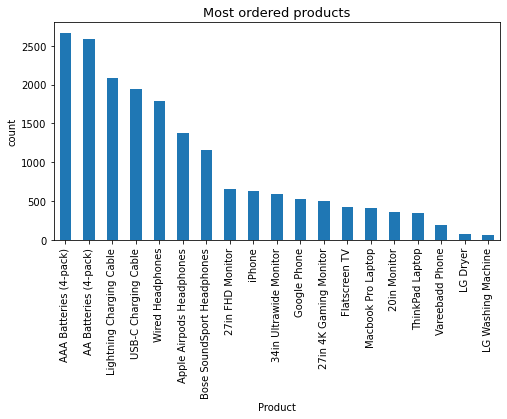

In [30]:
#Useing GroupBy and compute sum on specific column and sort from largest to smallest value
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(8,4))
plt.title("Most ordered products",fontsize=13)
plt.ylabel("count" )


### At any day orders are increased?

Text(0, 0.5, 'count')

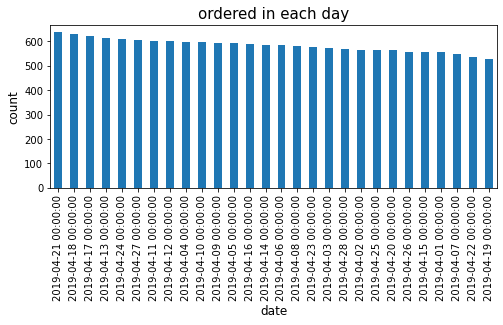

In [31]:
df['Date'].value_counts().plot(kind='bar',figsize=(8,3))
plt.title("ordered in each day",fontsize=15 )
plt.xlabel("date",fontsize=12)
plt.ylabel("count",fontsize=12 )


### what week have the highest earning in this month?

Text(0, 0.5, 'total price ')

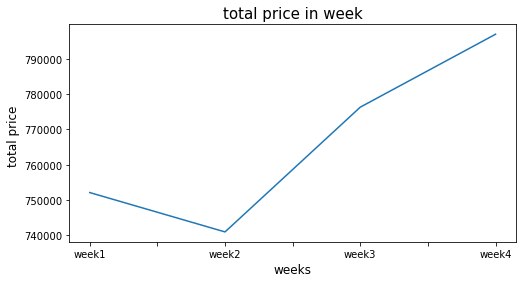

In [35]:
x=df.groupby(df['week_num'])['total'].sum().plot(kind='line',figsize=(8,4))

plt.title("total price in week",fontsize=15 )
plt.xlabel("weeks",fontsize=12)
plt.ylabel("total price ",fontsize=12 )

In [34]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]